In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

C:\Users\Kushagra\AppData\Local\Temp\ipykernel_13784\3766427179.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('./data/Bhadra Haralahalli.csv', header=0, names=['Date', 'Discharge'], parse_dates=['Date'])


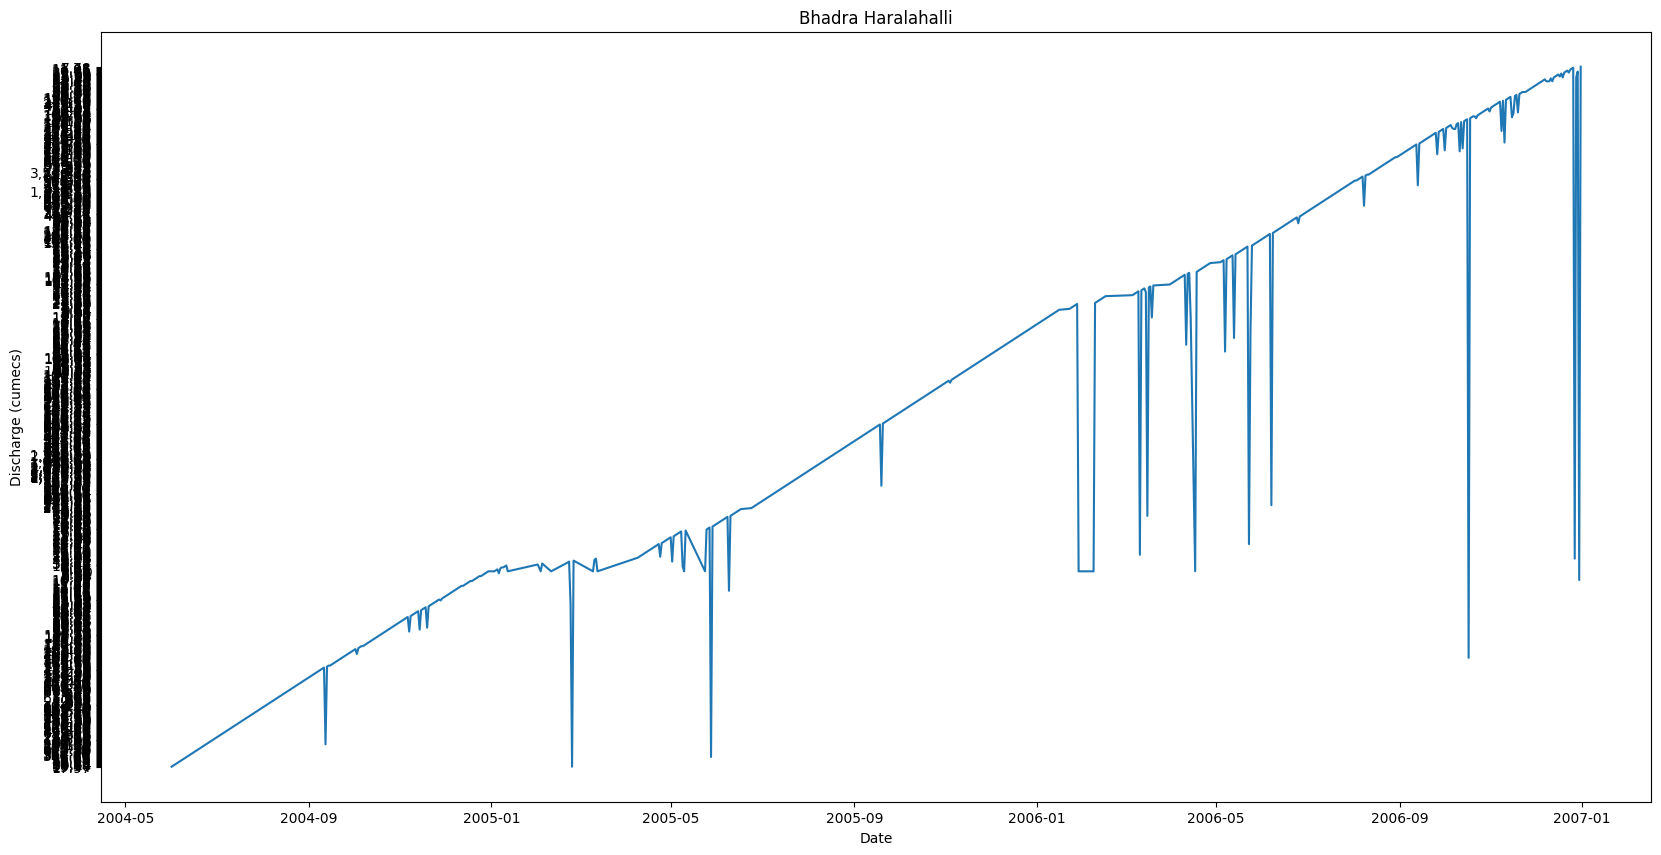

In [4]:
# Read data from csv file, data has 2 columns: Date and Discharge(cumsecs)
# Date is in dd/mm/yyyy format or dd-mm-yyyy format
# Some data values are missing or zero, use linear interpolation to fill them
df = pd.read_csv('./data/Bhadra Haralahalli.csv', header=0, names=['Date', 'Discharge'], parse_dates=['Date'])
df['Discharge'] = df['Discharge'].replace(0, np.nan).interpolate(method='linear')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df.set_index('Date')

# take values from June 2004 to December 2006
df = df.loc['2004-06-01':'2006-12-31']

# plot the data
plt.figure(figsize=(20, 10))
plt.plot(df['Discharge'])
plt.xlabel('Date')
plt.ylabel('Discharge (cumecs)')
plt.title('Bhadra Haralahalli')
plt.show()



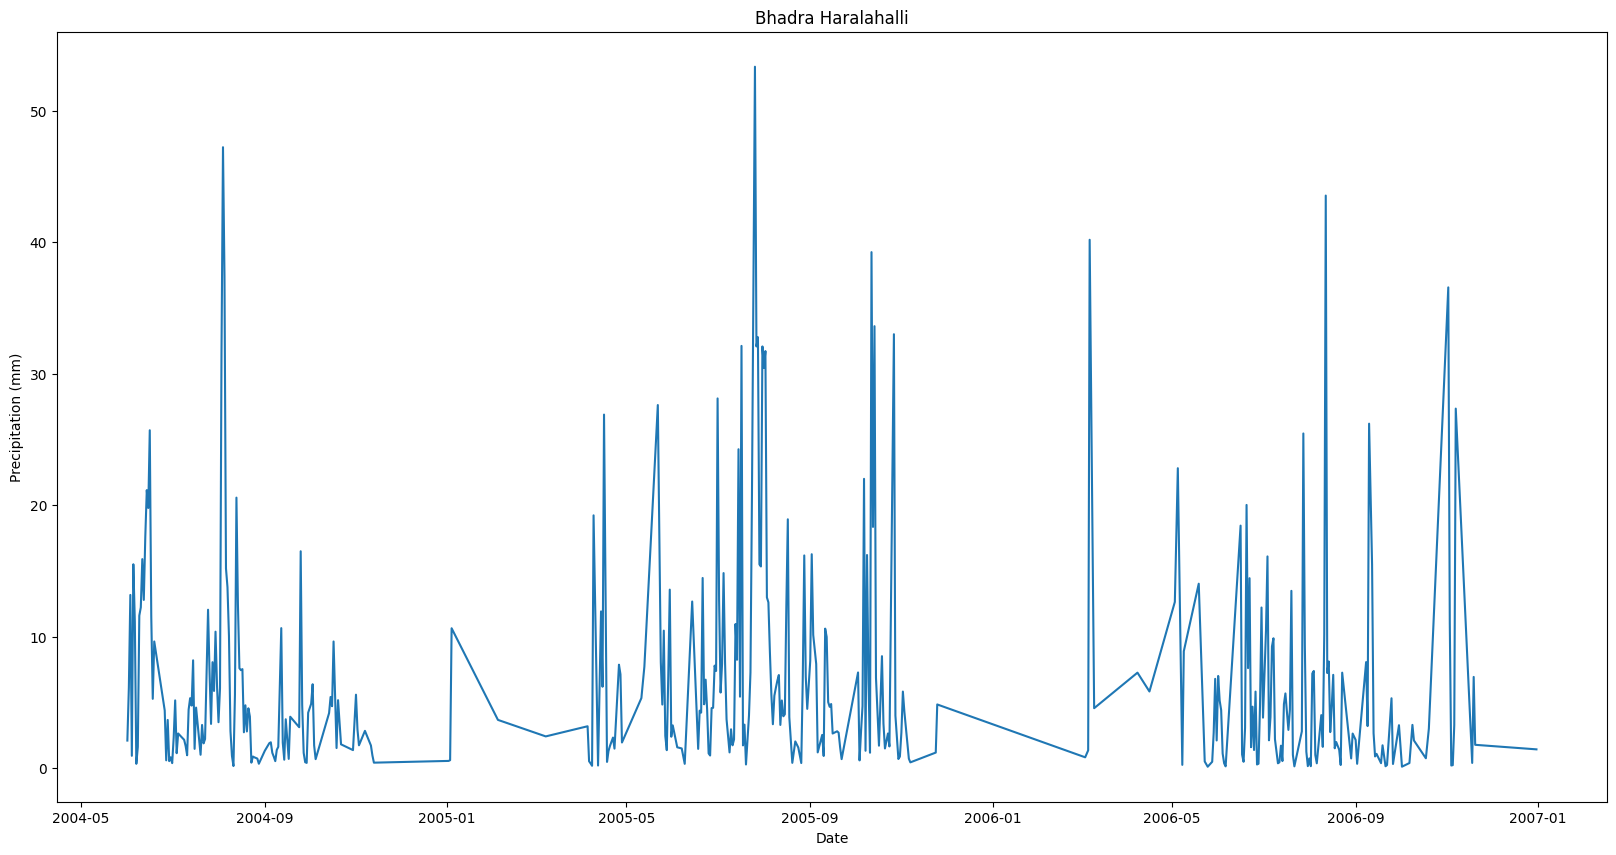

In [6]:
df = pd.read_csv('./data/precipitation_bhadra.csv', header=0, names=['Date', 'Precipitation'], parse_dates=['Date'])
df['Precipitation'] = df['Precipitation'].replace(0, np.nan).interpolate(method='linear')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df.set_index('Date')

# take values from June 2004 to December 2006
df = df.loc['2004-06-01':'2006-12-31']

# plot the data
plt.figure(figsize=(20, 10))
plt.plot(df['Precipitation'])
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Bhadra Haralahalli')
plt.show()

In [ ]:
# Code for extracting important features
# Assuming you have a DataFrame 'cle_data' for CLE reservoir
# and 'bhadra_data' for Bhadra reservoir with the respective columns

# Specify the threshold for feature importance
feature_importance_threshold = 0.01

# Function to perform feature extraction using Random Forest
def perform_feature_extraction(data, target_column):
    # Split the data into features and target
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Random Forest regressor
    rf_regressor = RandomForestRegressor()

    # Train the Random Forest model
    rf_regressor.fit(X_train, y_train)

    # Get feature importance scores
    feature_importances = rf_regressor.feature_importances_

    # Create a DataFrame with feature names and their importance scores
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

    # Select features above the threshold
    selected_features = feature_importance_df[feature_importance_df['Importance'] >= feature_importance_threshold]['Feature']

    # Display selected features
    print("Selected Features:")
    print(selected_features)

    return selected_features

# Example usage for Bhadra reservoir
bhadra_selected_features = perform_feature_extraction(bhadra_data, 'target_column_bhadra')